In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_dir = "~/repos/soilqc_anomaly_detection/data/save_manual/"

%matplotlib inline

# Explore single month

In [33]:
month = "11"
filename = f"2019-{month}.csv"

df = pd.read_csv(data_dir+filename, index_col="DAY_HOUR")

# Clean up df.
df = df.drop(
    columns=[
        c for c in df.columns 
        if "MEAN" in c
    ]
)
df = df.dropna(axis=1, how="all")
df = df.fillna(method="ffill", axis=1)

df.head(10)

,A_M2005,A_M2010,H_M3010,A_M1020,H_M2020,A_M3020,A_M1050,A_M1100,P_OFFICIAL
DAY_HOUR,,,,,,,,,
01-00,0.105,0.119,0.119,0.135,0.102,0.104,0.126,0.107,0.0
01-01,0.104,0.119,0.119,0.134,0.101,0.104,0.126,0.107,0.0
01-02,0.104,0.119,0.119,0.133,0.102,0.104,0.125,0.107,0.0
01-03,0.103,0.118,0.118,0.133,0.101,0.104,0.125,0.107,0.0
01-04,0.103,0.118,0.118,0.133,0.099,0.104,0.124,0.107,0.0
01-05,0.103,0.118,0.118,0.132,0.100,0.104,0.123,0.107,0.0
01-06,0.103,0.116,0.116,0.132,0.099,0.104,0.123,0.107,0.0
01-07,0.103,0.117,0.117,0.132,0.098,0.104,0.122,0.107,0.0
01-08,0.103,0.116,0.116,0.131,0.098,0.103,0.122,0.107,0.0


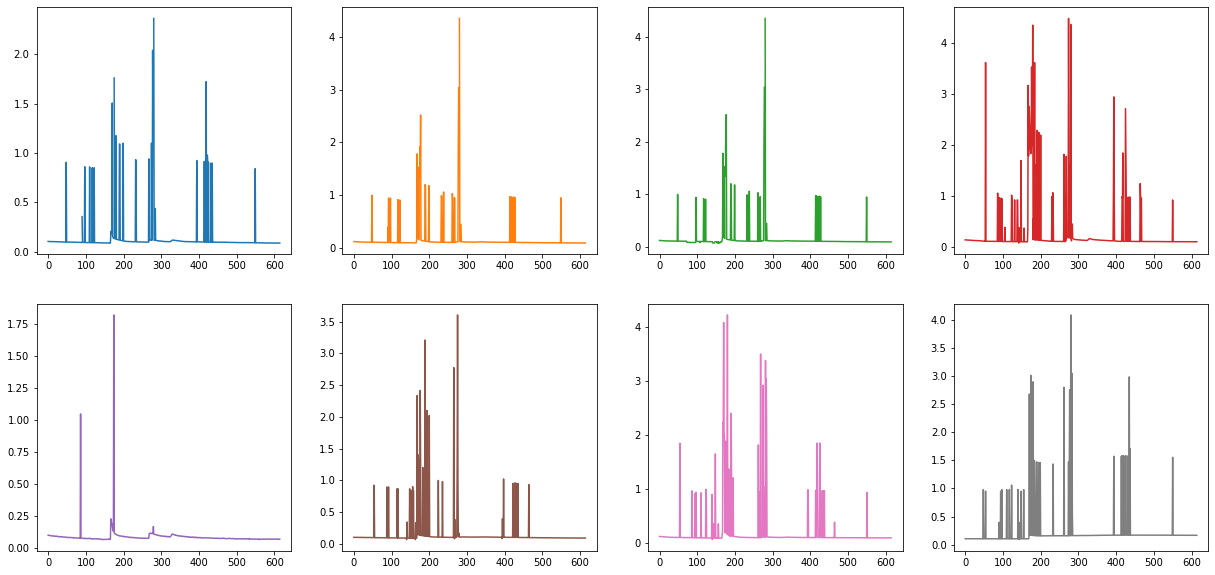

In [34]:
fig, axs = plt.subplots(2, 4, figsize=(21,10))
for c, ax in enumerate(axs.reshape(-1)) :
    _ = ax.plot(df.values[:,c], color=f"C{c}")

# Create first finite difference feature

In [35]:
df_diff = df.diff()
df_diff.iloc[0] = np.zeros(len(df_diff.columns))

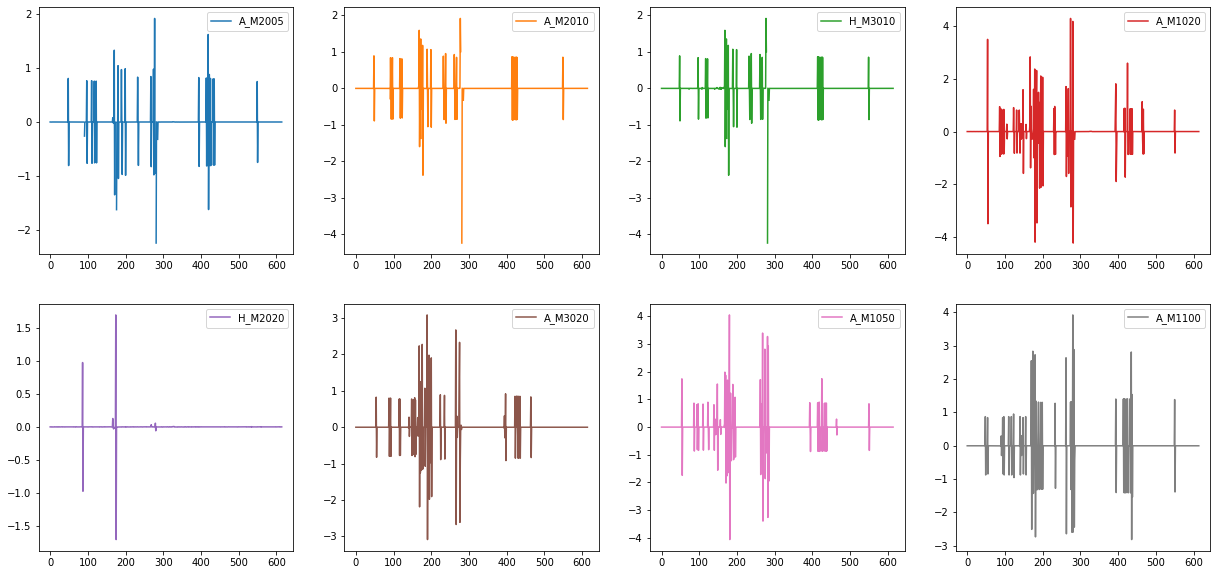

In [36]:
fig, axs = plt.subplots(2, 4, figsize=(21,10))
for c, ax in enumerate(axs.reshape(-1)) :
    _ = ax.plot(df_diff.values[:,c], color=f"C{c}", label=df.columns.values[c])
    ax.legend()

## Co-plot 1st derivative feature with parent time series

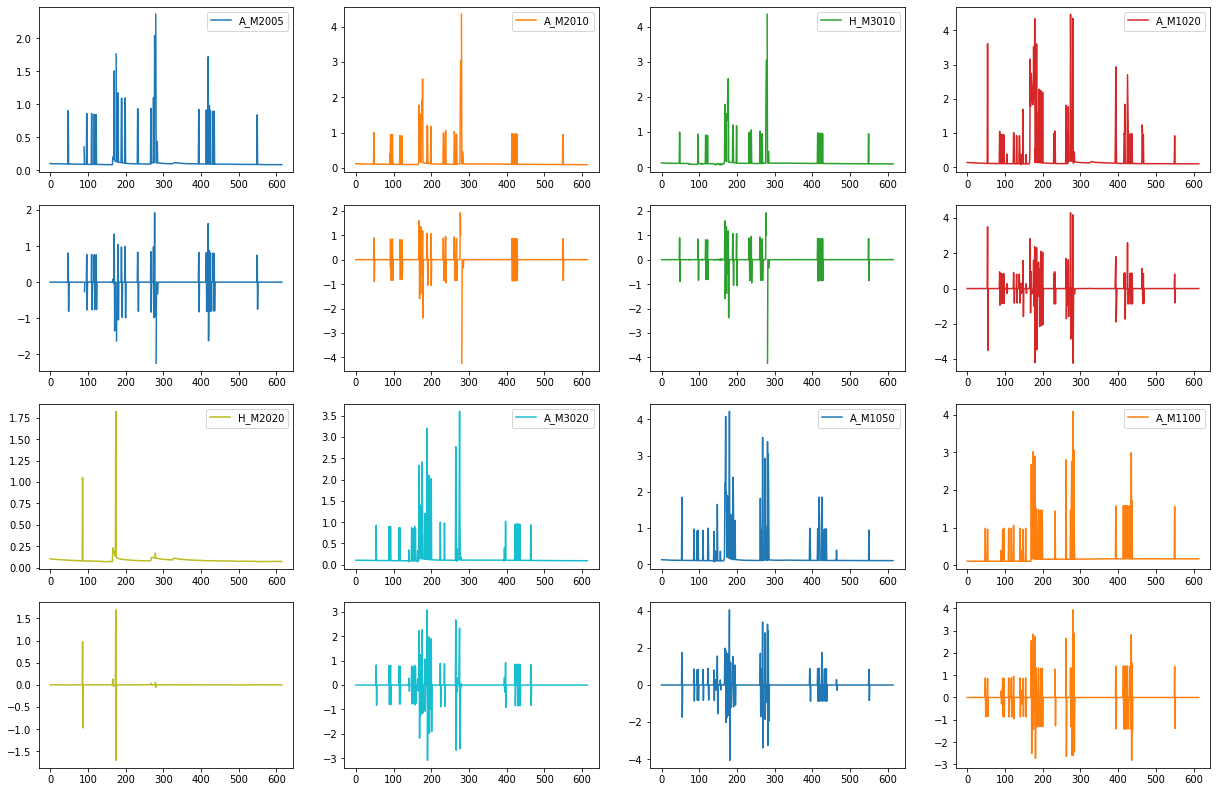

In [37]:
fig, axs = plt.subplots(4, 4, figsize=(21,14))
flattened_axs = axs.reshape(-1)
for c in [0, 1, 2, 3, 8, 9, 10, 11]:
    if c >= 8:
        col_idx = c - 4
    else:
        col_idx = c
    _ = flattened_axs[c].plot(df.values[:,col_idx], color=f"C{c}", label=df.columns.values[col_idx])
    flattened_axs[c].legend()
    _ = flattened_axs[c+4].plot(df_diff.values[:,col_idx], color=f"C{c}")

# Test an automatic labeling system

In [40]:
labels = df_diff.drop(columns=["P_OFFICIAL"])
labels = labels > 0.25
labels = labels.astype(int)
labels.sum()

A_M2005    22
A_M2010    23
H_M3010    22
A_M1020    44
H_M2020     2
A_M3020    34
A_M1050    35
A_M1100    37
dtype: int64

# Export labeled sensor data to XLSX for manual inspection/curation

In [41]:
save_dir = "../data/sensors/og/"
for idx in range(8):
    sensor = pd.concat(
        [df.iloc[:, idx], df_diff.iloc[:, idx], df["P_OFFICIAL"], labels.iloc[:, idx]], 
        axis=1
    )
    sensor.columns = ["raw", "diff", "precip", "label"]
    sensor.to_csv(save_dir + f"{df.columns[idx]}.csv")

# Perform for all months, all sensors

In [42]:
save_dir = "../data/sensors/"

# Create list of all months to be considered.
months = [str(i).zfill(2) for i in range(3,12)]

# Iterate through these months.
for month in months:
    
    # Load and preprocess month's CSV.
    df = pd.read_csv(data_dir+filename, index_col="DAY_HOUR")
    df = df.drop(
        columns=[
            c for c in df.columns 
            if "MEAN" in c
        ]
    )
    df = df.dropna(axis=1, how="all")
    df = df.fillna(method="ffill", axis=1).fillna(method="bfill", axis=1)
    
    # Create a dataframe of the first finite differences.
    df_diff = df.diff()
    df_diff.iloc[0] = np.zeros(len(df_diff.columns))
    
    # Create a labels dataframe.
    labels = df_diff.drop(columns=["P_OFFICIAL"])
    labels = labels > 0.25
    labels = labels.astype(int)
    
    # Iterate through each sensor, concatenate its data and labels together,
    # and save as a CSV.
    for idx in range(len(df.columns)-1):
        sensor = pd.concat(
            [df.iloc[:, idx], df_diff.iloc[:, idx], df["P_OFFICIAL"], labels.iloc[:, idx]], 
            axis=1
        )
        sensor.columns = ["raw", "diff", "precip", "label"]
        sensor.to_csv(save_dir + f"{month}_{df.columns[idx]}.csv")
        print(f"{month}_{df.columns[idx]}.csv")

03_A_M2005.csv
03_A_M2010.csv
03_H_M3010.csv
03_A_M1020.csv
03_H_M2020.csv
03_A_M3020.csv
03_A_M1050.csv
03_A_M1100.csv
04_A_M2005.csv
04_A_M2010.csv
04_H_M3010.csv
04_A_M1020.csv
04_H_M2020.csv
04_A_M3020.csv
04_A_M1050.csv
04_A_M1100.csv
05_A_M2005.csv
05_A_M2010.csv
05_H_M3010.csv
05_A_M1020.csv
05_H_M2020.csv
05_A_M3020.csv
05_A_M1050.csv
05_A_M1100.csv
06_A_M2005.csv
06_A_M2010.csv
06_H_M3010.csv
06_A_M1020.csv
06_H_M2020.csv
06_A_M3020.csv
06_A_M1050.csv
06_A_M1100.csv
07_A_M2005.csv
07_A_M2010.csv
07_H_M3010.csv
07_A_M1020.csv
07_H_M2020.csv
07_A_M3020.csv
07_A_M1050.csv
07_A_M1100.csv
08_A_M2005.csv
08_A_M2010.csv
08_H_M3010.csv
08_A_M1020.csv
08_H_M2020.csv
08_A_M3020.csv
08_A_M1050.csv
08_A_M1100.csv
09_A_M2005.csv
09_A_M2010.csv
09_H_M3010.csv
09_A_M1020.csv
09_H_M2020.csv
09_A_M3020.csv
09_A_M1050.csv
09_A_M1100.csv
10_A_M2005.csv
10_A_M2010.csv
10_H_M3010.csv
10_A_M1020.csv
10_H_M2020.csv
10_A_M3020.csv
10_A_M1050.csv
10_A_M1100.csv
11_A_M2005.csv
11_A_M2010.csv
11_H_M3010

# Plot data with shading overlaid to check for labeling errors

In [47]:
save_dir = "../data/sensors/"
df = pd.read_csv(save_dir+"03_A_M2005.csv", index_col="DAY_HOUR")
df.index = [i for i in range(len(df.index.values))]

In [48]:
anom_idxs = df.label[df.label == 1].index.values
anom_shading_regions = [
    (i-1, i+1) for i in anomlous_idxs
]

In [55]:
precip_idxs = df.precip[df.precip> 0].index.values
precip_shading_regions = [
    (i-1, i+1) for i in precip_idxs
]

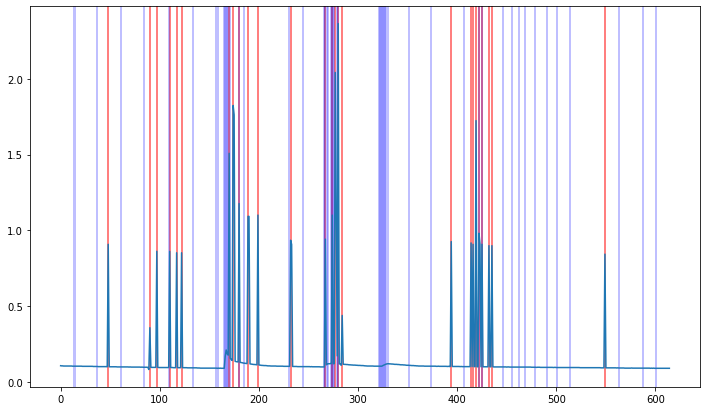

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot(df.raw)
for anom in anom_shading_regions:
    ax.axvspan(anom[0], anom[1], facecolor="r", alpha=0.5)
for precip in precip_shading_regions:
    ax.axvspan(precip[0], precip[1], facecolor="b", alpha=0.25)

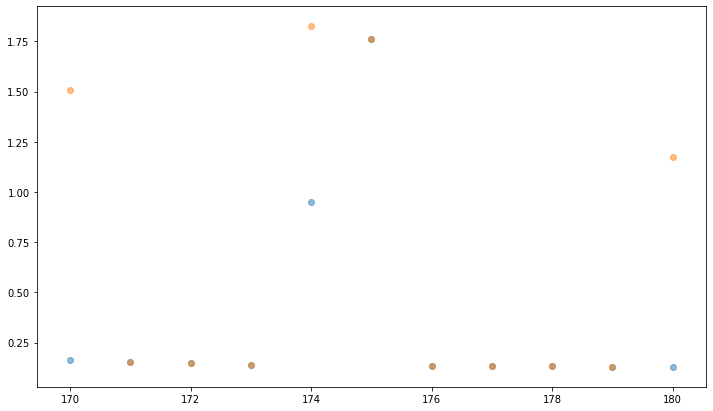

In [118]:
df_mod = df.copy()
for idx in anom_idxs:
    df_mod.raw.loc[idx] = np.nan

df_interp = df_mod.interpolate(method="linear")

start = 170
stop = 180
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.scatter([i for i in range(start, stop+1)], df_interp.raw.loc[start:stop], alpha=0.5)
ax.scatter([i for i in range(start, stop+1)], df.raw.loc[start:stop], alpha=0.5)
# ax.scatter([i for i in range(start, stop+1)], df_interp["diff"].loc[start:stop])

# for anom in anom_shading_regions:
#     ax.axvspan(anom[0], anom[1], facecolor="r", alpha=0.5)
# for precip in precip_shading_regions:
#     ax.axvspan(precip[0], precip[1], facecolor="b", alpha=0.25)

In [122]:
df.loc[start:stop]

,raw,diff,precip,label
170,1.508,1.333,0.0,1
171,0.155,-1.353,0.6,0
172,0.146,-0.009,0.0,0
173,0.140,-0.006,0.0,0
174,1.824,1.684,0.0,1
175,1.762,-0.062,0.0,0
176,0.134,-1.628,0.0,0
177,0.132,-0.002,0.0,0
178,0.131,-0.001,0.0,0
179,0.130,-0.001,0.0,0


In [120]:
df_interp.loc[start:stop]

,raw,diff,precip,label
170,0.1650,1.333,0.0,1
171,0.1550,-1.353,0.6,0
172,0.1460,-0.009,0.0,0
173,0.1400,-0.006,0.0,0
174,0.9510,1.684,0.0,1
175,1.7620,-0.062,0.0,0
176,0.1340,-1.628,0.0,0
177,0.1320,-0.002,0.0,0
178,0.1310,-0.001,0.0,0
179,0.1300,-0.001,0.0,0


(array([  1.,   2.,   7.,  15.,   5., 561.,  14.,   5.,   3.,   2.]),
 array([-2.248 , -1.8037, -1.3594, -0.9151, -0.4708, -0.0265,  0.4178,
         0.8621,  1.3064,  1.7507,  2.195 ]),
 <a list of 10 Patch objects>)

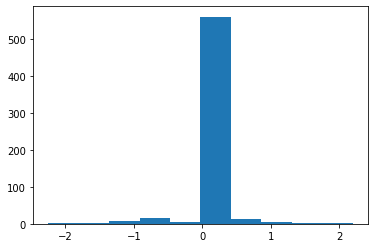

In [112]:
plt.hist(df["diff"].values)

## Smooth where anomalies occur

In [59]:
from scipy import signal

# SALVAGE YARD

In [138]:
# df = pd.concat(
#     [
#         pd.read_csv(data_dir+f"2019-{month}.csv")
#         for month in months
#     ],
#     axis=0
# )

# # Clean up df.
# df = df.drop(
#     columns=[
#         c for c in df.columns 
#         if "MEAN" in c
#     ] + ["DAY_HOUR"]
# )
# df = df.dropna(axis=1, how="all")
# df = df.fillna(method="ffill", axis=1)

# df.head(10)

In [120]:
# # Examine precip labels

# precip = df["P_OFFICIAL"]>0
# precip = precip.astype(int)
# _ = precip.plot()